<a href="https://colab.research.google.com/github/Godbolemanvi/NYC-Taxi-Trip-Duration-Prediction/blob/main/NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**

**By - Manvi Godbole**

### **Git Hub Link:** https://github.com/Godbolemanvi/NYC-Taxi-Trip-Duration-Prediction

## Problem Description
### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.
## Data Description
### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### NYC Taxi Data.csv - the training set (contains 1458644 trip records)

## **Data fields**


*   **id -** a unique identifier for each trip
*   **vendor_id -** a code indicating the provider associated with the trip record

*  **pickup_datetime -** date and time when the meter was engaged
*  **dropoff_datetime -** date and time when the meter was disengaged

* **passenger_count -** the number of passengers in the vehicle (driver entered value)

*   **pickup_longitude -** the longitude where the meter was engaged



*   **pickup_latitude -**the latitude where the meter was engaged

*  **dropoff_longitude -** the longitude where the meter was disengaged
*   **dropoff_latitude -** the latitude where the meter was disengaged


*   **store_and_fwd_flag -** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a
 connection to the server - Y=store and forward; N=not a store and forward trip

*   **trip_duration -** duration of the trip in seconds









In [ ]:
#Install Library  use to calculate the haversine distance 

!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ="/content/NYC Taxi Data.csv"
NYC_df = pd.read_csv(path)
     

## **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.


I did some basic first hand explorations by looking at data frames,looking at its shape,info etc.

In [ ]:
NYC_df .head(10)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
5  id0801584          2  2016-01-30 22:01:40  2016-01-30 22:09:03   
6  id1813257          1  2016-06-17 22:34:59  2016-06-17 22:40:40   
7  id1324603          2  2016-05-21 07:54:58  2016-05-21 08:20:49   
8  id1301050          1  2016-05-27 23:12:23  2016-05-27 23:16:38   
9  id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N          455.0  
1         40.731152                  N          663.0  
2         40.710087                  N         2124.0  
3         40.706718                  N          429.0  
4         40.782520                  N          435.0  
5         40.749184                  N          443.0  
6         40.765896                  N          341.0  
7         40.760559                  N         1551.0  
8         40.732815                  N          255.0  
9         40.789989                  N         1225.0

In [ ]:
NYC_df .shape

(38123, 11)

There are 38123 rows and 11 columns.

In [ ]:
NYC_df .describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  38123.000000     38123.000000      38123.000000     38123.000000   
mean       1.530310         1.667602        -73.973413        40.751319   
std        0.499087         1.318768          0.037861         0.027902   
min        1.000000         1.000000        -74.347069        40.586266   
25%        1.000000         1.000000        -73.991699        40.737694   
50%        2.000000         1.000000        -73.981636        40.754620   
75%        2.000000         2.000000        -73.966942        40.768581   
max        2.000000         6.000000        -73.518051        41.091171   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       38123.000000      38123.000000   38122.000000  
mean          -73.973195         40.752064     937.642070  
std             0.037004          0.032676    3012.661297  
min           -74.379631         40.556324       1.000000  
25%           -73.991325         40.735987     394.000000  
50%           -73.979599         40.754768     659.000000  
75%           -73.962730         40.770176    1070.000000  
max           -72.711395         41.311520   86357.000000

Pasenger count varies from 0 to 9. Trip duration has max value of 3526282 seconds almost 979.5 hours and minimum 1 second. This definetly has outliers present so we'll remove them


# Label details:
trip_duration - duration of the trip in seconds

In [ ]:
# checking data-types of variables to identify the numerical and categorical variables
NYC_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
NYC_df['pickup_datetime']=pd.to_datetime(NYC_df['pickup_datetime'])
NYC_df['dropoff_datetime']=pd.to_datetime(NYC_df['dropoff_datetime'])
NYC_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N          455.0  
1         40.731152                  N          663.0  
2         40.710087                  N         2124.0  
3         40.706718                  N          429.0  
4         40.782520                  N          435.0

In [ ]:
NYC_df ['pickup_day']=NYC_df ['pickup_datetime'].dt.day_name()
NYC_df ['dropoff_day']=NYC_df ['dropoff_datetime'].dt.day_name()
     

### NAN or Missing Values:
It is wise to check for any missing value present in our dataset as many modelling procedures may break down. if there's any missing value present in our dataset the corresponding rows will either have to be removed completely from dataset or the values need to be estimated somehow

In [ ]:
#Check for NaN values
NYC_df['trip_duration'].isnull().sum()

1

In [ ]:
#Check for duplicated values
NYC_df.drop_duplicates(inplace=True)
NYC_df.shape

(38123, 13)

There are approx 1.5 million records in our dataset.

There is no NaN/NULL record in the dataset, So we dont have to impute any record.

In [ ]:
NYC_df['passenger_count'].value_counts().reset_index()

index  passenger_count
0      1            27008
1      2             5477
2      5             2031
3      3             1541
4      6             1285
5      4              781

In [ ]:
NYC_df["pickup_datetime"][0]

Timestamp('2016-03-14 17:24:55')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



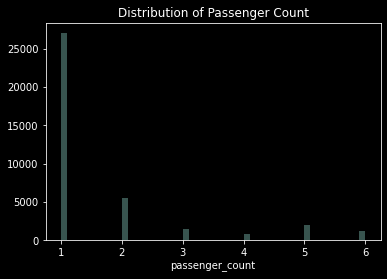

In [ ]:
plt.style.use("dark_background")
sns.distplot(NYC_df ['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

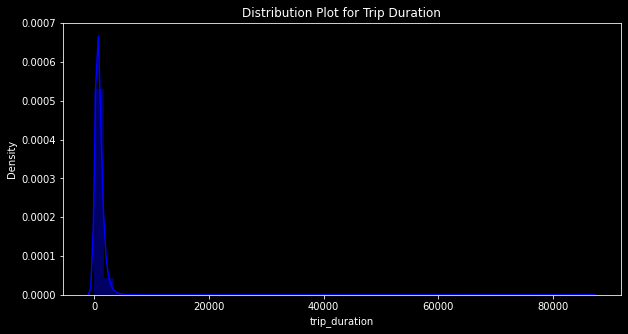

In [ ]:
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(NYC_df['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

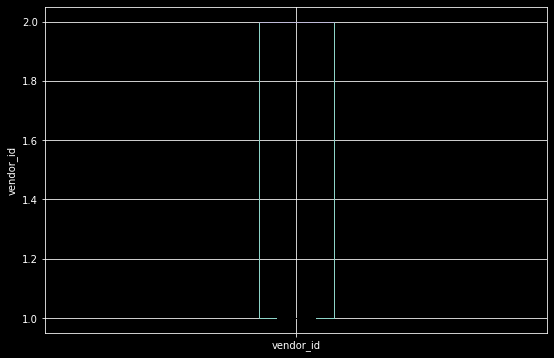

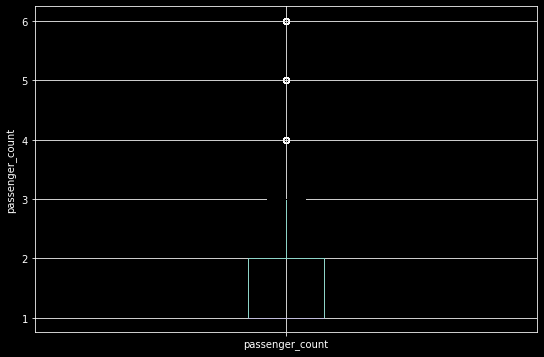

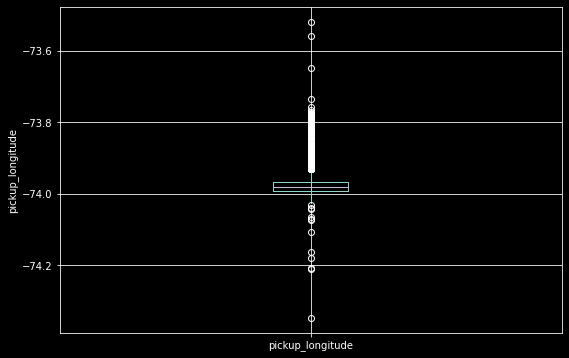

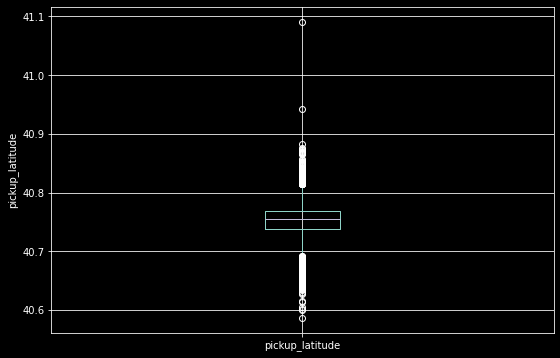

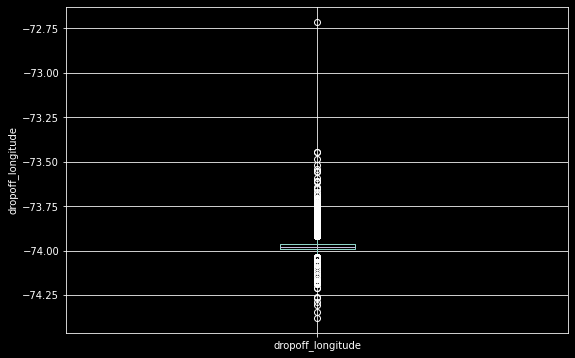

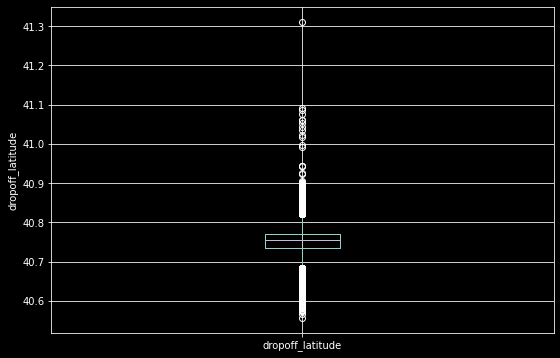

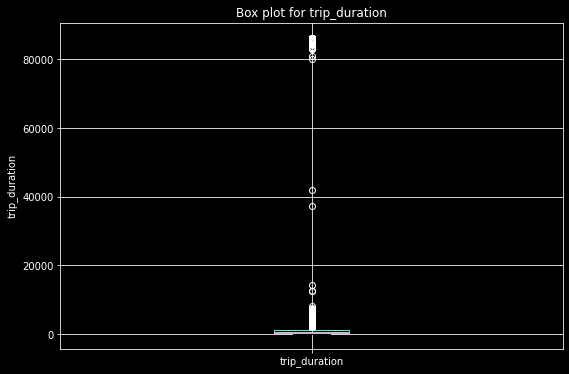

In [ ]:
# plot a boxplot for the label by each numerical feature  
for col in NYC_df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  NYC_df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

Vendor ID has no outlier.

In passenger count 4 and more passengers are being treated as outliers.

pickup_longitude and pickup_latitude has outliers as well.

dropoff_longitude and dropoff_latitude has outliers too.

Our target variable trip_duration has alot of outliers

Checking consitency of trip_duration

from the box plot we see that there are few outlier having very large value. we have to remove those outlier. but first let check the consitency of feature "trip duration". To do so we calculate the difference between pick and dropoff time.

In [ ]:
# creating a function that will out trip duration from pick and dropoff time
def calculate_trip_duration(pickup,dropoff):
    return (dropoff-pickup).total_seconds()
  

In [ ]:
# creating a feature which stores this calculated trip duration
NYC_df['calculate_trip_duration']=NYC_df.apply(lambda x: calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)

In [ ]:
# checking for consistency by comparing trip duration with calculated trip duration
(NYC_df['calculate_trip_duration']==NYC_df['trip_duration']).value_counts()

True     38122
False        1
dtype: int64

Here, we see that there the trip duration is consistent with the calculated trip duration. so, this large value are purely an outlier.

In [ ]:
# Dropping the feature created 
NYC_df.drop(['calculate_trip_duration'],axis=1,inplace=True)

To checked for outlier we segregate our dependent variable into different categories i.e trip whose duration is less then 1min, within 10mins,within hour,within day, within two day and more than two day

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'less then 1min'),
  Text(1, 0, 'within 10 mins'),
  Text(2, 0, 'within 30 mins'),
  Text(3, 0, 'within hour'),
  Text(4, 0, 'within day'),
  Text(5, 0, 'within two days'),
  Text(6, 0, 'more then two day')])

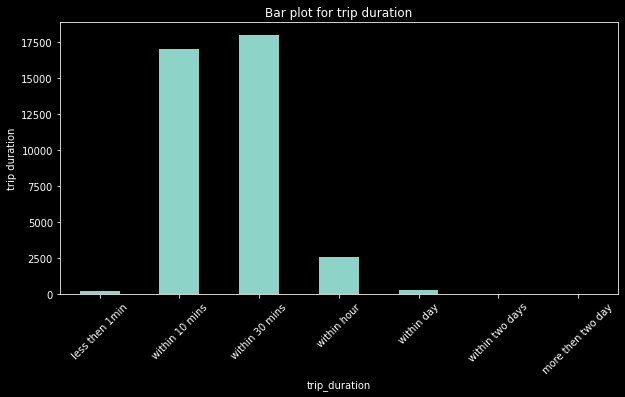

In [ ]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
NYC_df.groupby(pd.cut(NYC_df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

In [ ]:
numeric_features = NYC_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

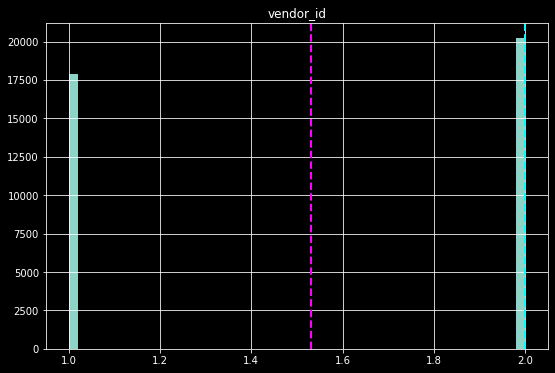

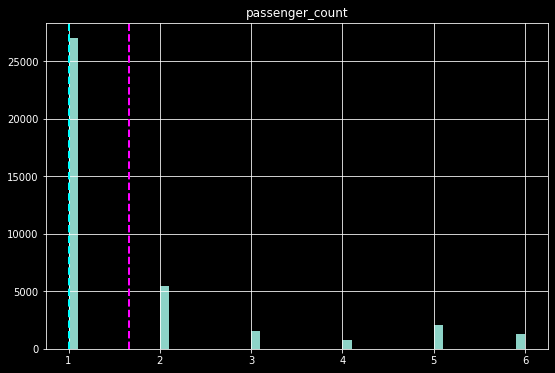

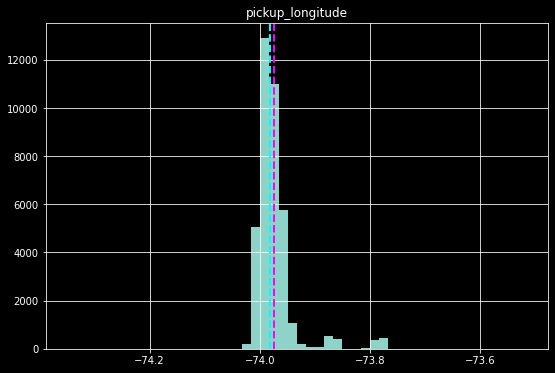

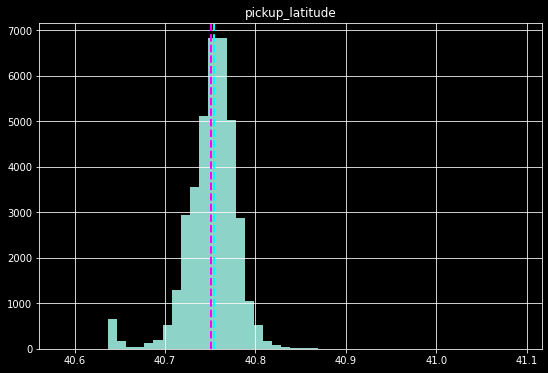

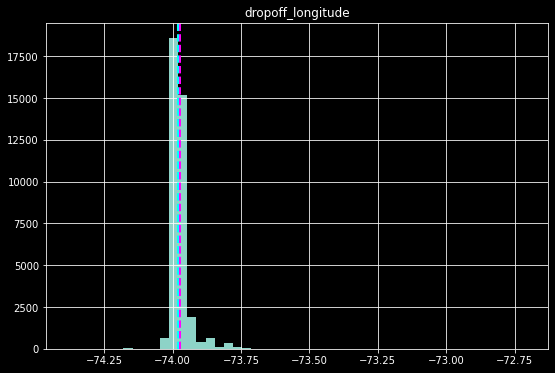

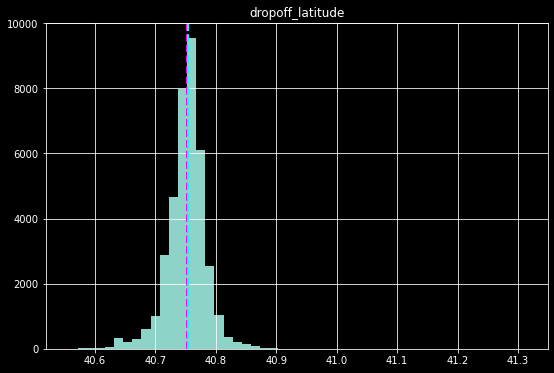

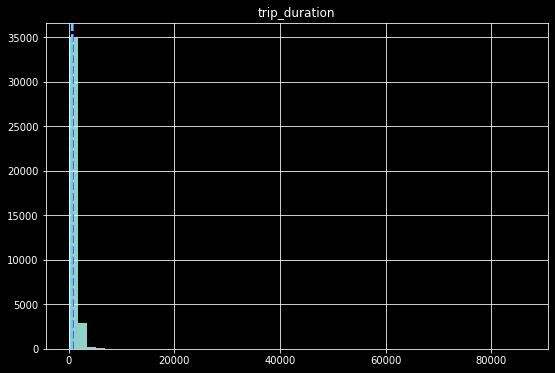

In [ ]:
# plot a bar plot for each numerical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = NYC_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

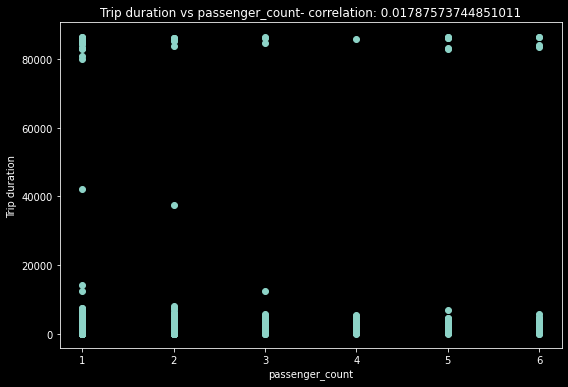

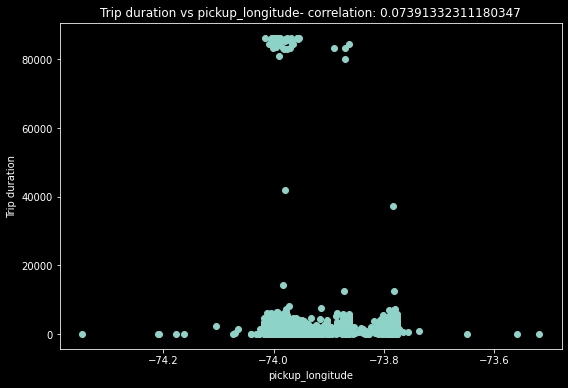

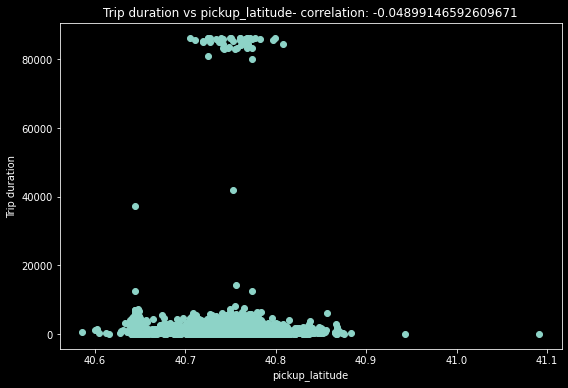

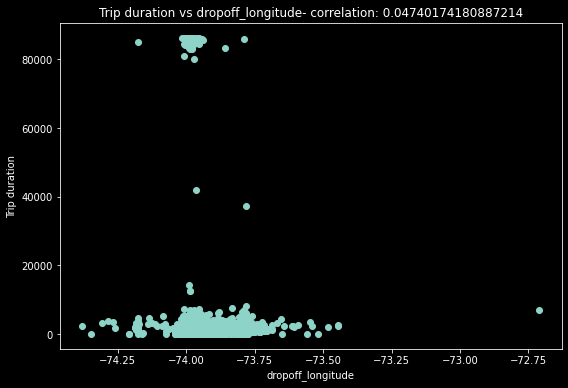

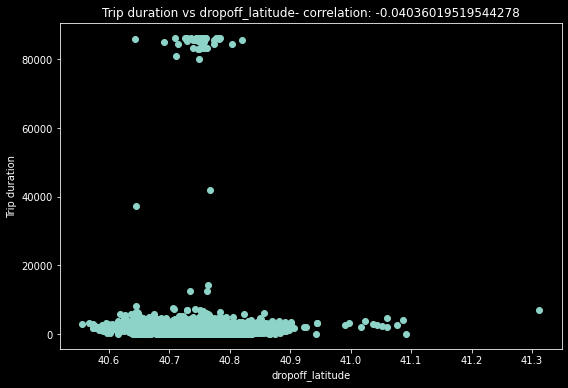

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = NYC_df[col]
    label = NYC_df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(NYC_df[col], NYC_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(NYC_df[col])

    plt.plot(NYC_df[col], y_hat, "r--", lw=1)

plt.show()

## Map Visualization

---
We shall visualize the Taxi pickup locations by placing long and lat marker on the MAP of the US. So that we can analyze below questions:

*  Are all pickups constrained to NYC and it's surrounding areas?
*  Is there any unusual location of the pickup?
*  Are the lat long constrained to the land area of the US and nowhere else?










(-74.03, -73.75)

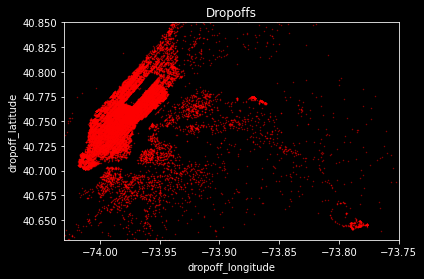

In [ ]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

NYC_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
def select_within_boundingbox(df, BB):
    return ((nyc_df["pickup_longitude"] >= BB[0]) & (nyc_df["pickup_longitude"] <= BB[1]) & 
            (nyc_df["pickup_latitude"] >= BB[2]) & (nyc_df["pickup_latitude"] <= BB[3]) &
            (nyc_df["dropoff_longitude"] >= BB[0]) & (nyc_df["dropoff_longitude"] <= BB[1]) &
            (nyc_df["dropoff_latitude"] >= BB[2]) & (nyc_df["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

# Folium


---


folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

Concepts folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [ ]:
import folium   

In [ ]:
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
nyc

In [ ]:
for i in NYC_df.index[:100]:
  folium.Marker(location=[NYC_df['pickup_latitude'][i],NYC_df['pickup_longitude'][i]],icon=folium.Icon(color="blue")).add_to(nyc)
nyc

In [ ]:
for i in NYC_df.index[:100]:
  folium.Marker(location=[NYC_df['dropoff_latitude'][i],NYC_df['dropoff_longitude'][i]],icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)
nyc

# FEATURE ENGINEERING


---



---


Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [ ]:
#Calculate and assign new columns to the dataframe such as pickupday,
#dropoffday which will help us to gain more insights from the data.
NYC_df['pickup_day']=NYC_df['pickup_datetime'].dt.day_name()
NYC_df['dropoff_day']=NYC_df['dropoff_datetime'].dt.day_name()
NYC_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N          455.0     Monday      Monday  
1         40.731152                  N          663.0     Sunday      Sunday  
2         40.710087                  N         2124.0    Tuesday     Tuesday  
3         40.706718                  N          429.0  Wednesday   Wednesday  
4         40.782520                  N          435.0   Saturday    Saturday

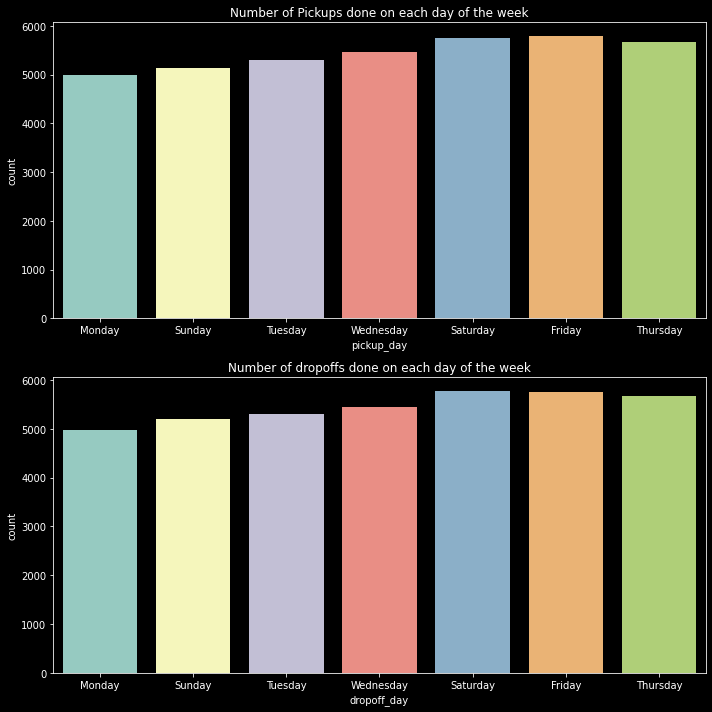

In [ ]:
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=NYC_df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=NYC_df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

Thus we see most trips were taken on Friday and Monday being the least. The distribution of trip duration with the days of the week is something to look into as well.

In [ ]:
bins=np.array([0,1800,3600,5400,7200,90000])
NYC_df['duration_time']=pd.cut(NYC_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [ ]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
NYC_df['pickup_timezone']=NYC_df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
NYC_df['dropoff_timezone']=NYC_df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

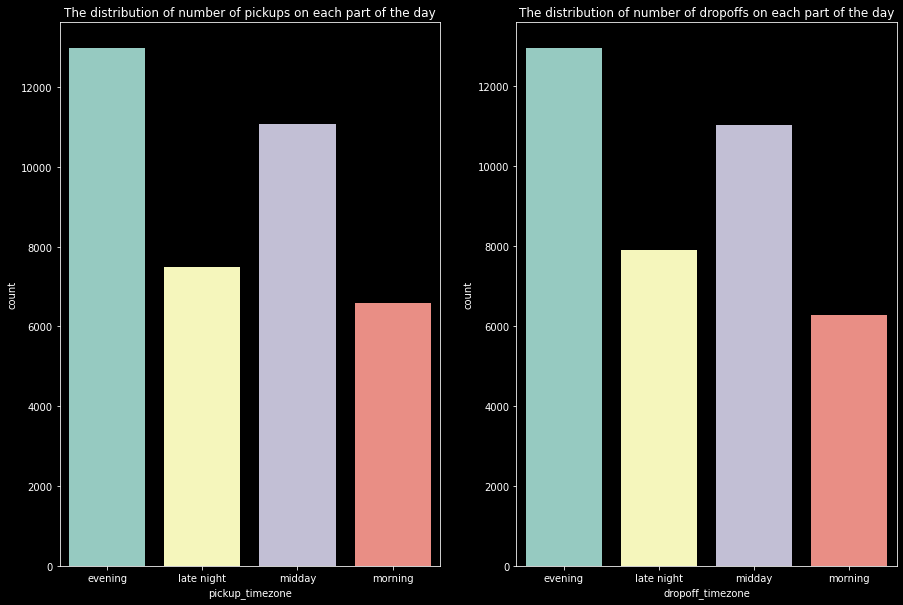

In [ ]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=NYC_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=NYC_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Calculate distance and assign new column to the dataframe.
NYC_df["distance"] = NYC_df.apply(lambda x: calc_distance(x),axis=1)

### Outlier Detection using IQR Method

IQR=Q3-Q1

lower_limit_outlier=Q1-1.5*IQR

upper_limit_outlier=Q3+1.5*IQR¶

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier remove the outlier present in distance

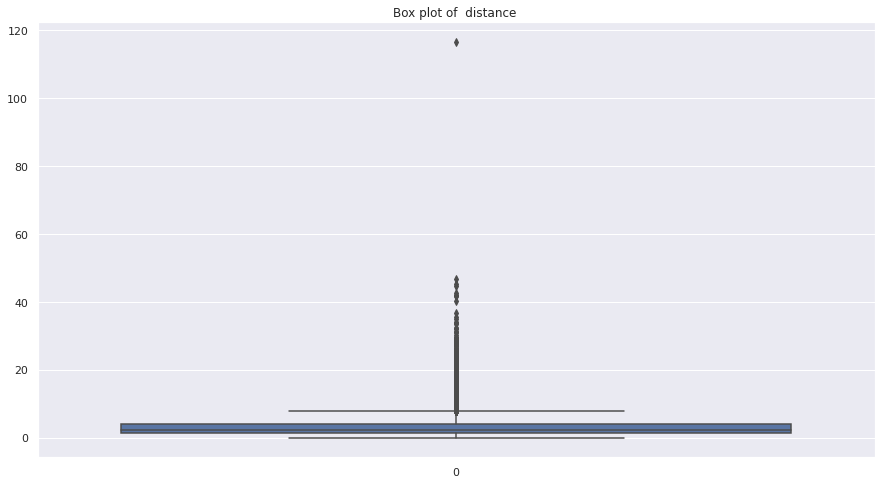

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=NYC_df['distance'], orient="v")

In [ ]:
percentile_q1 = np.percentile(NYC_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(NYC_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(NYC_df['distance'],75)
print(percentile_q3)

1.2303056255050369
2.0773105511108407
3.8432264798565123


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.689075656022177
Upper limit for outlier  : 7.762607761383726


In [ ]:
nyc_df=NYC_df[NYC_df['distance']>lower_limit_outlier]
nyc_df=NYC_df[NYC_df['distance']<upper_limit_outlier]

In [ ]:
NYC_df.shape

(38123, 15)

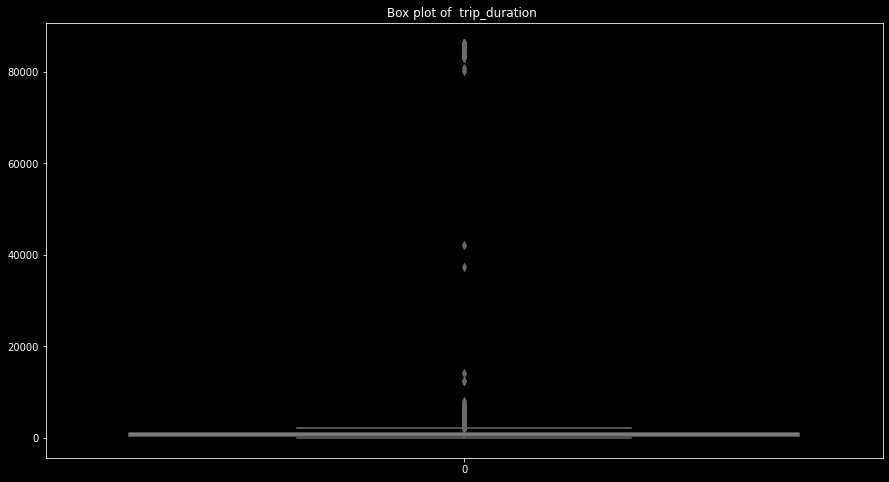

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=NYC_df['trip_duration'], orient="v")

In [ ]:
percentile_q1_trip_duration = np.percentile(NYC_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(NYC_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(NYC_df['trip_duration'],75)
print(percentile_q3_trip_duration)

nan
nan
nan


In [ ]:
percentile_q1_trip_duration = np.percentile(nyc_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(nyc_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(nyc_df['trip_duration'],75)
print(percentile_q3_trip_duration)

394.0
659.0
1070.0


In [ ]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -620.0
Upper limit for outlier  : 2084.0


In [ ]:
nyc_df=nyc_df[nyc_df['trip_duration']>0]
nyc_df=nyc_df[nyc_df['trip_duration']<upper_limit_outlier_trip_duration]

In [ ]:
nyc_df.shape

(36184, 17)

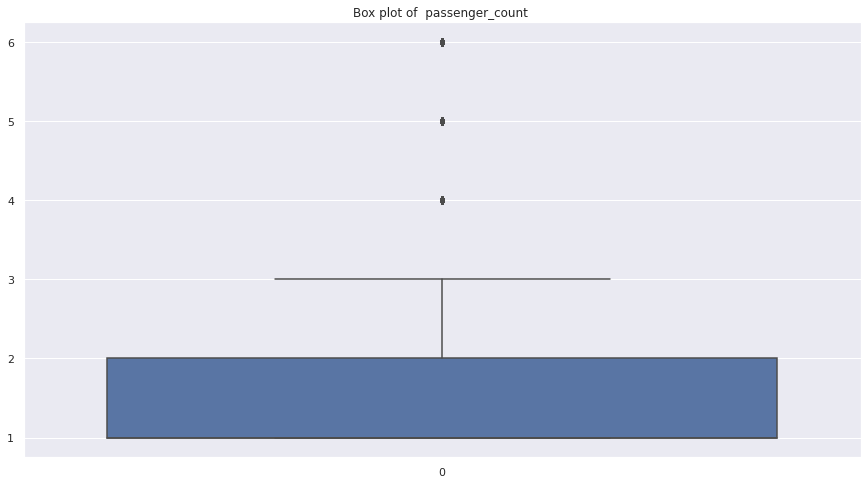

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=nyc_df['passenger_count'])

In [ ]:
percentile_q1_passenger_count = np.percentile(nyc_df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(nyc_df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(nyc_df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [ ]:

iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
nyc_df=nyc_df[nyc_df['passenger_count']>0]
nyc_df=nyc_df[nyc_df['passenger_count']<upper_limit_outlier_passenger_count]

In [ ]:
nyc_df.shape

(32286, 17)

In [ ]:
#convert dattime in "%Y-%m-%d %H:%M:%S" format
nyc_df["pickup_datetime"] = pd.to_datetime(nyc_df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
nyc_df['Day']=nyc_df['pickup_datetime'].dt.day_name()

In [ ]:
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
nyc_df["year"] = nyc_df["pickup_datetime"].apply(lambda x: x.year)
nyc_df["month"] = nyc_df["pickup_datetime"].apply(lambda x: x.month)
nyc_df["day_num"] = nyc_df["pickup_datetime"].apply(lambda x: x.day)
nyc_df["hour"] = nyc_df["pickup_datetime"].apply(lambda x: x.hour)
nyc_df["minute"] = nyc_df["pickup_datetime"].apply(lambda x: x.minute)

In [ ]:
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
7  id1324603          2 2016-05-21 07:54:58 2016-05-21 08:20:49   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude store_and_fwd_flag  ...  pickup_timezone dropoff_timezone  \
0         40.765602                  N  ...          evening          evening   
1         40.731152                  N  ...       late night       late night   
3         40.706718                  N  ...          evening          evening   
4         40.782520                  N  ...           midday           midday   
7         40.760559                  N  ...          morning          morning   

  duration_time  distance        Day  year  month day_num  hour  minute  
0           < 5  1.498523     Monday  2016      3      14    17      24  
1           < 5  1.805510     Sunday  2016      6      12     0      43  
3           < 5  1.485500  Wednesday  2016      4       6    19      32  
4           < 5  1.188590   Saturday  2016      3      26    13      30  
7           < 5  5.714989   Saturday  2016      5      21     7      54  

[5 rows x 23 columns]

Converting trip duration into hours.

Taking log of our distance for normalisation of data.

Taking log of our trip duration as well to normalize it's data too.

In [ ]:
nyc_df['trip_duration_hour']=nyc_df['trip_duration']/3600
nyc_df['log_distance']=np.log(nyc_df.distance)
nyc_df['log_trip_duration']=np.log(nyc_df.trip_duration_hour)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

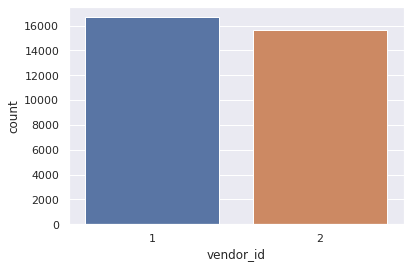

In [ ]:
#Distribution of the vendor id for the taxi trip
sns.countplot(x='vendor_id',data=nyc_df)


Though both the vendors seems to have almost equal market share. But Vendor 1 is evidently more famous among the population as per the above graph.

### Store_and_fwd_flag


---


This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

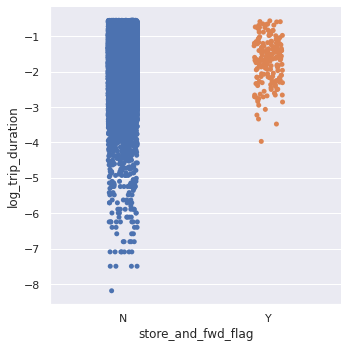

In [ ]:
#Distribution of the Store and Fwd flag
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=nyc_df)

### Observations:

Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:
Outstation trips didn't had proper connection at the time when trip completes.
Temporary loss of signals while the trip was about to finish
Inconsistent signal reception over the trip duration.
The GPS or mobile device battery was down when the trip finished.
Let's check further

## Bivariate Analysis


---



Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

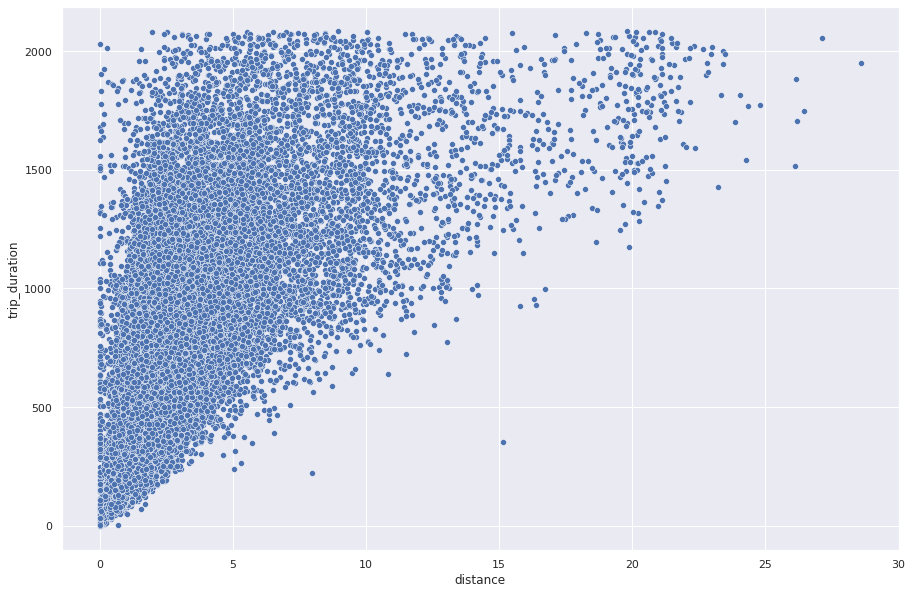

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=nyc_df)

<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

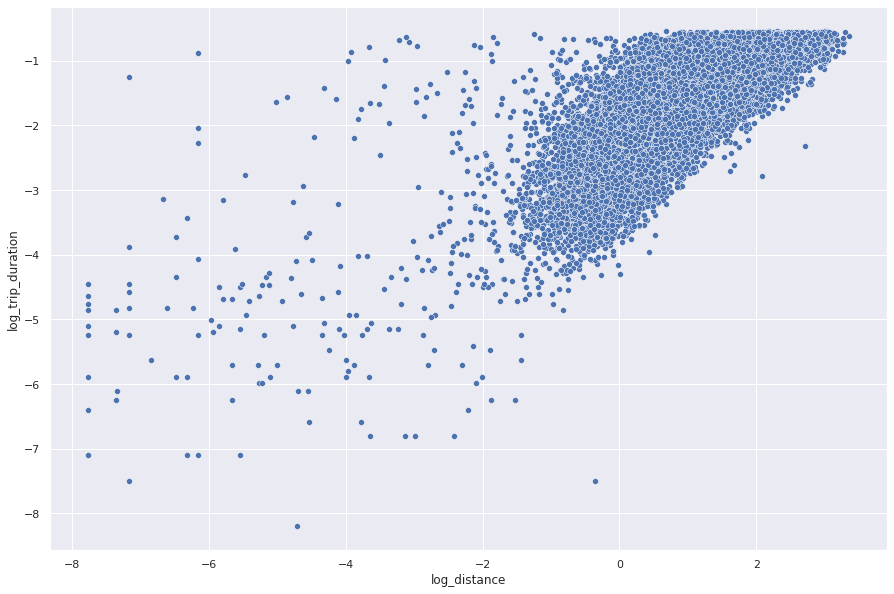

In [ ]:

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=nyc_df)

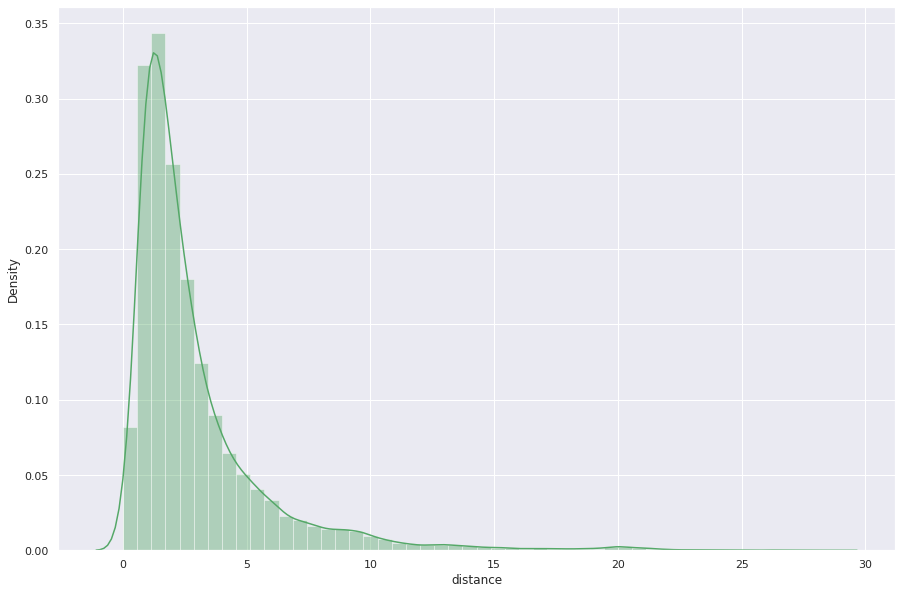

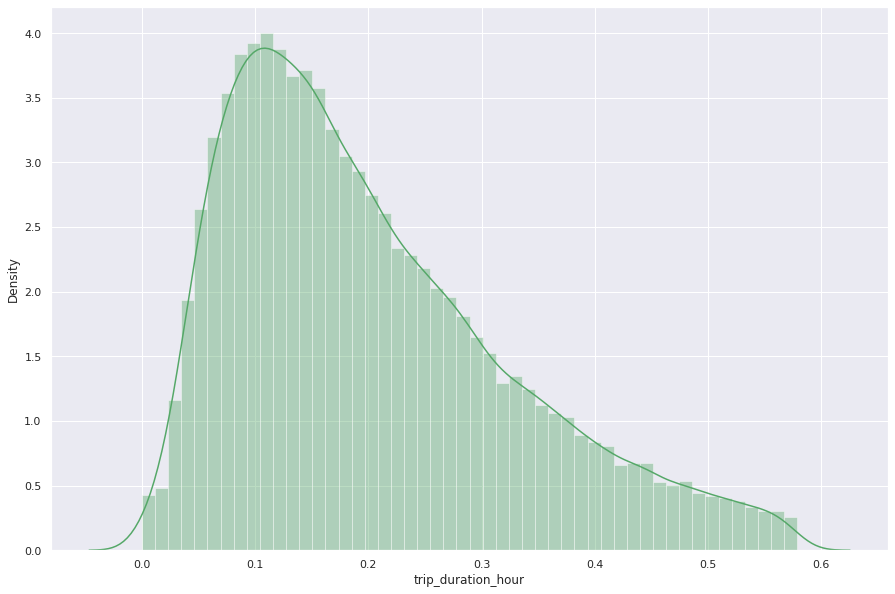

In [ ]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(nyc_df[i],color="g")

In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
nyc_df= pd.get_dummies(nyc_df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [ ]:
#Feature for the Machine learning models
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Wednesday','trip_duration_hour']
trip_data=nyc_df[features]

In [ ]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_data=nyc_df[newdata]

### Split Data
Lets split our data first before scaling the features

In [ ]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = nyc_df[features].apply(zscore)[:100000]
y=nyc_df['trip_duration_hour'][:100000]

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(25828, 18) (25828,)
(6458, 18) (6458,)


# Correlation Analysis


---




Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.


### Heatmap

A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

Let's plot the relationship between the features of the Feature selection group first

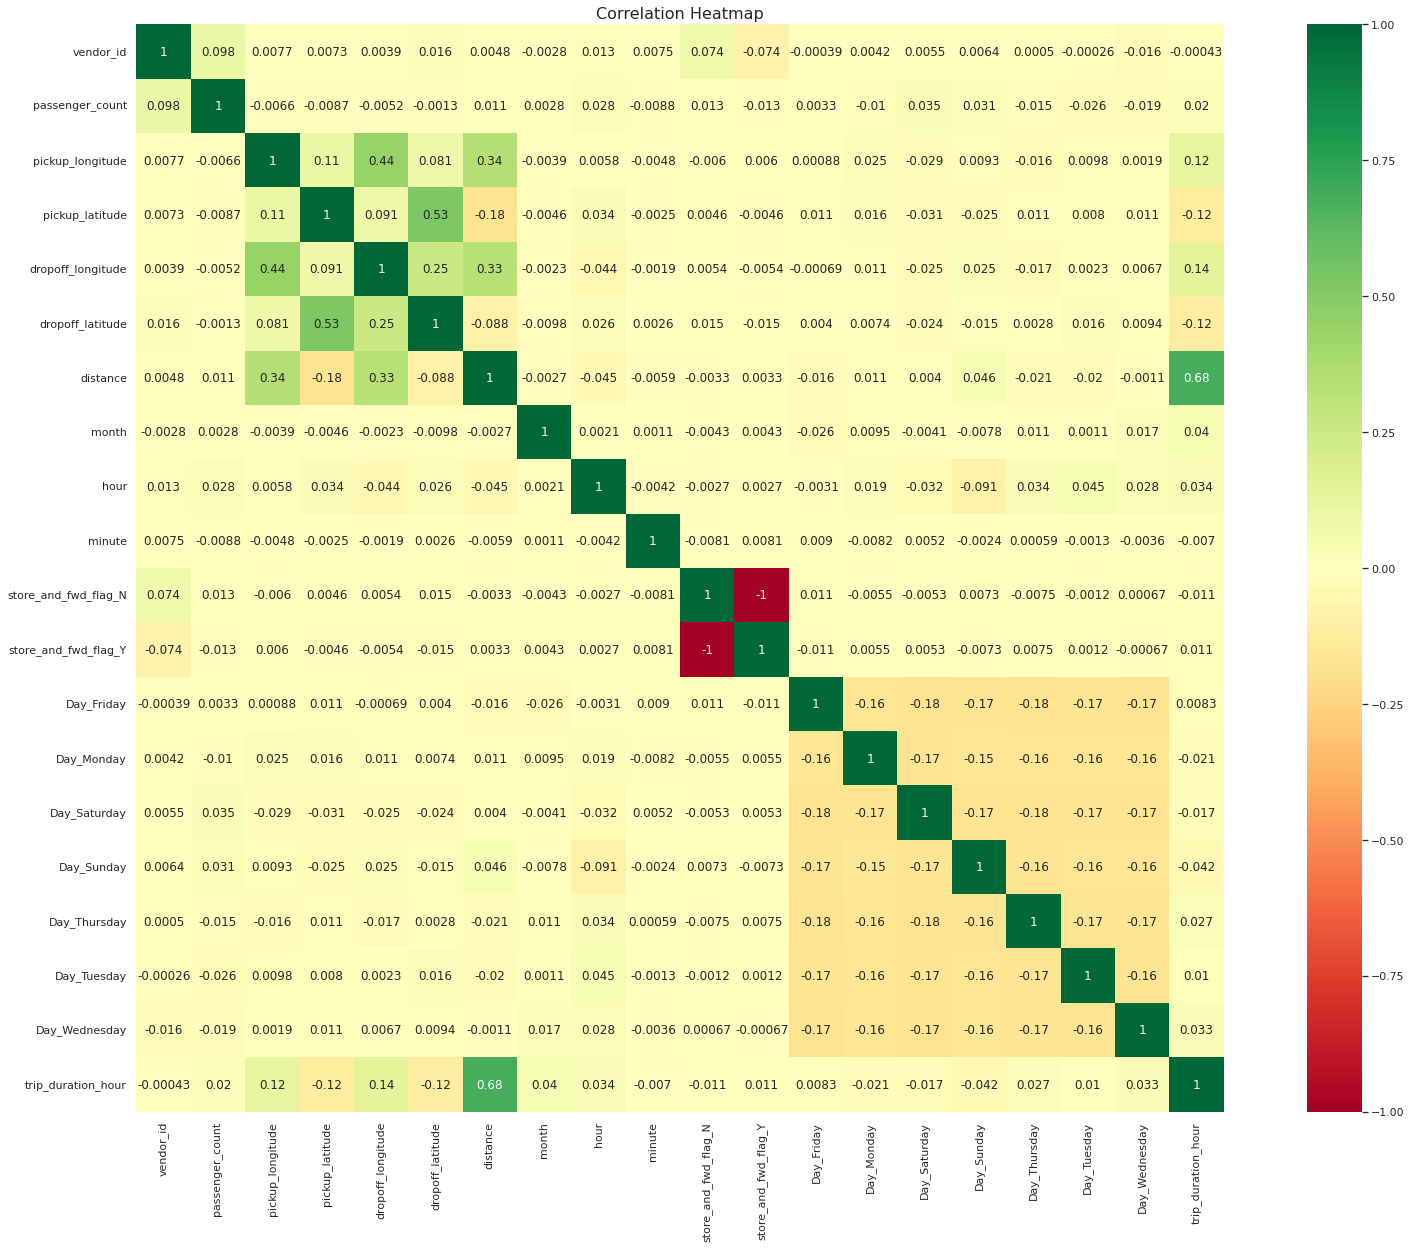

In [ ]:
plt.figure (figsize= (30,20))

sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 

#Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
y_pred_train = reg.predict(X_train)

MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

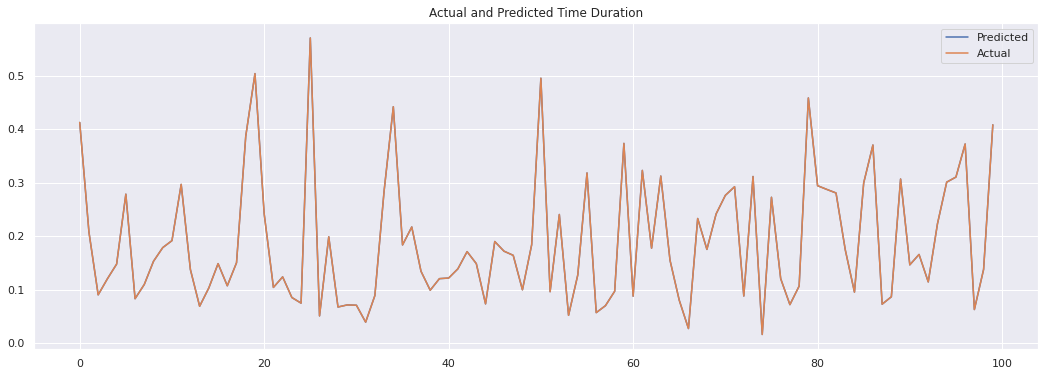

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)


MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

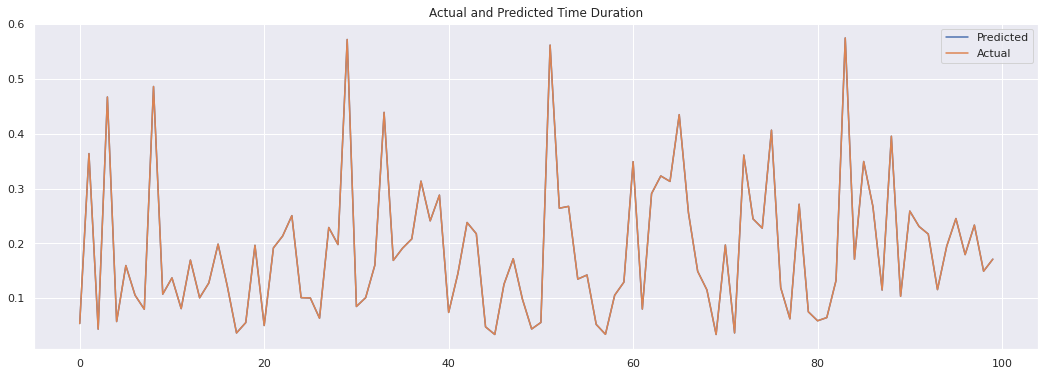

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

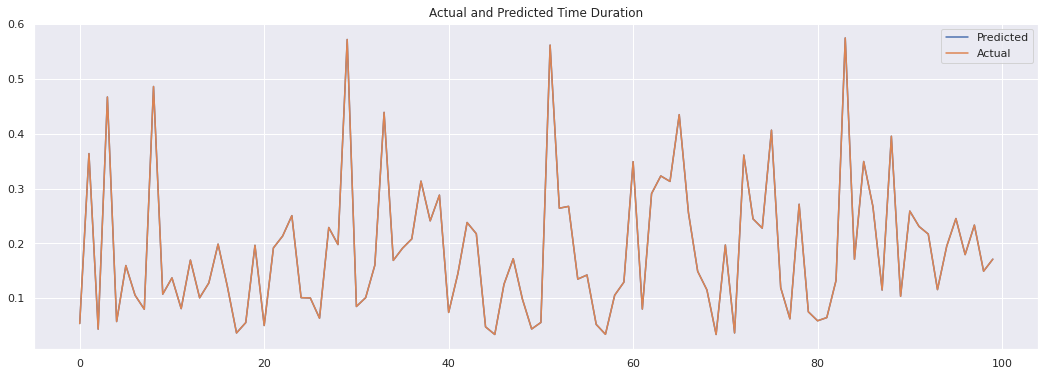

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

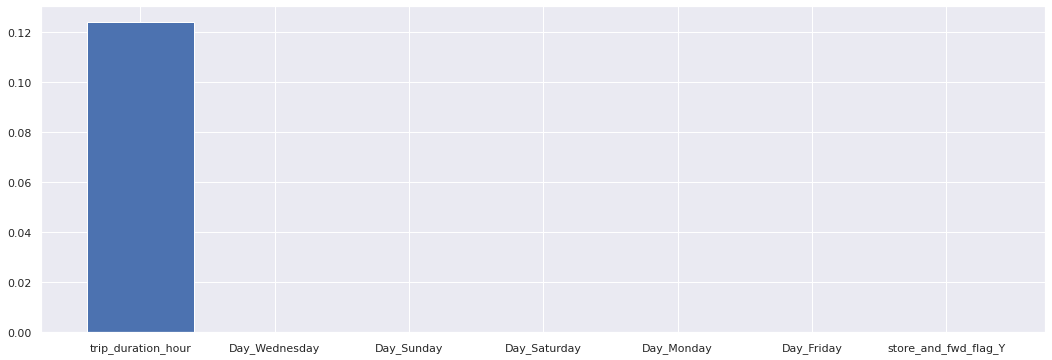

In [ ]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=features
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

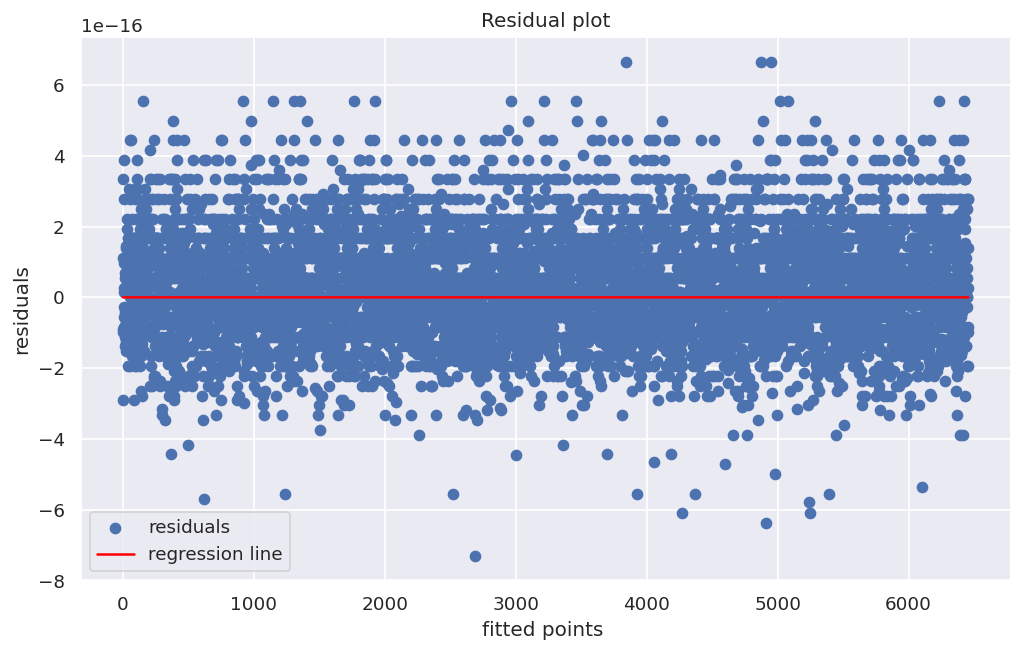

In [ ]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

### DECISION TREE

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.9999973396794595

In [ ]:
dt_grid.best_score_

0.9999973396794595

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20)

In [ ]:
dt_optimal_model =dt_grid.best_estimator_

In [ ]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [ ]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.999998255726622 Adjusted R2 : 0.9999982545101115


(0.0, 0.0, 0.999998255726622, 0.9999982545101115)

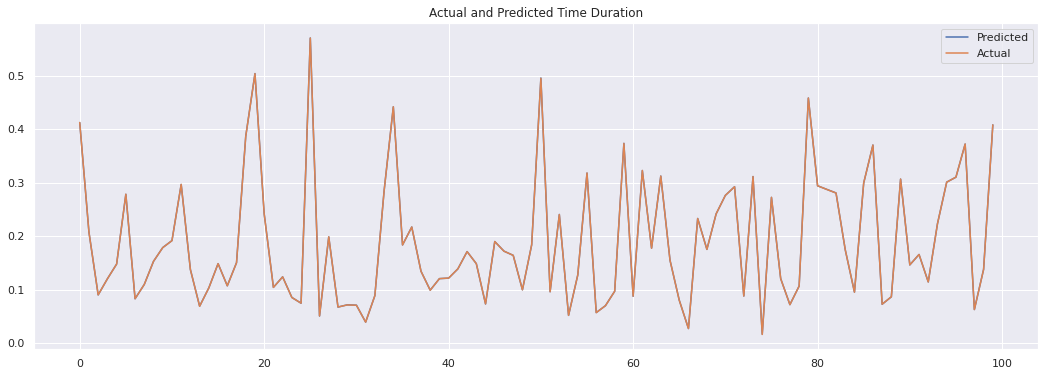

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_dt_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999976863511276 Adjusted R2 : 0.9999976798834028


(0.0, 0.0, 0.9999976863511276, 0.9999976798834028)

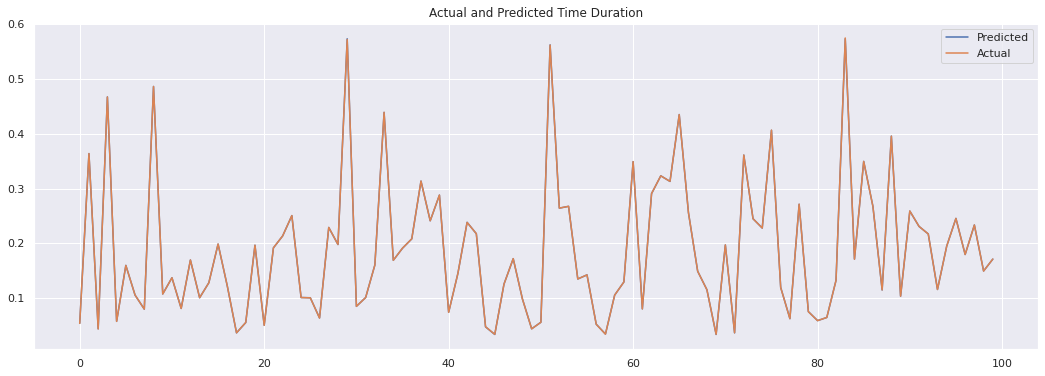

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_dt_test)

In [ ]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Wednesday',
       'trip_duration_hour'],
      dtype='object')

In [ ]:
dt_optimal_model.feature_importances_

array([6.54612350e-10, 0.00000000e+00, 5.82205545e-09, 4.74092208e-09,
       8.90370827e-09, 7.59039030e-09, 2.93782636e-09, 9.27818313e-10,
       6.05259885e-09, 1.28222529e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.99999961e-01])

In [ ]:
importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
17    trip_duration_hour        1.000000e+00
4      dropoff_longitude        8.903708e-09
5       dropoff_latitude        7.590390e-09
8                   hour        6.052599e-09
2       pickup_longitude        5.822055e-09
3        pickup_latitude        4.740922e-09
6               distance        2.937826e-09
9                 minute        1.282225e-09
7                  month        9.278183e-10
0              vendor_id        6.546123e-10
1        passenger_count        0.000000e+00
10  store_and_fwd_flag_N        0.000000e+00
11  store_and_fwd_flag_Y        0.000000e+00
12            Day_Friday        0.000000e+00
13            Day_Monday        0.000000e+00
14          Day_Saturday        0.000000e+00
15            Day_Sunday        0.000000e+00
16         Day_Wednesday        0.000000e+00

<AxesSubplot:title={'center':'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

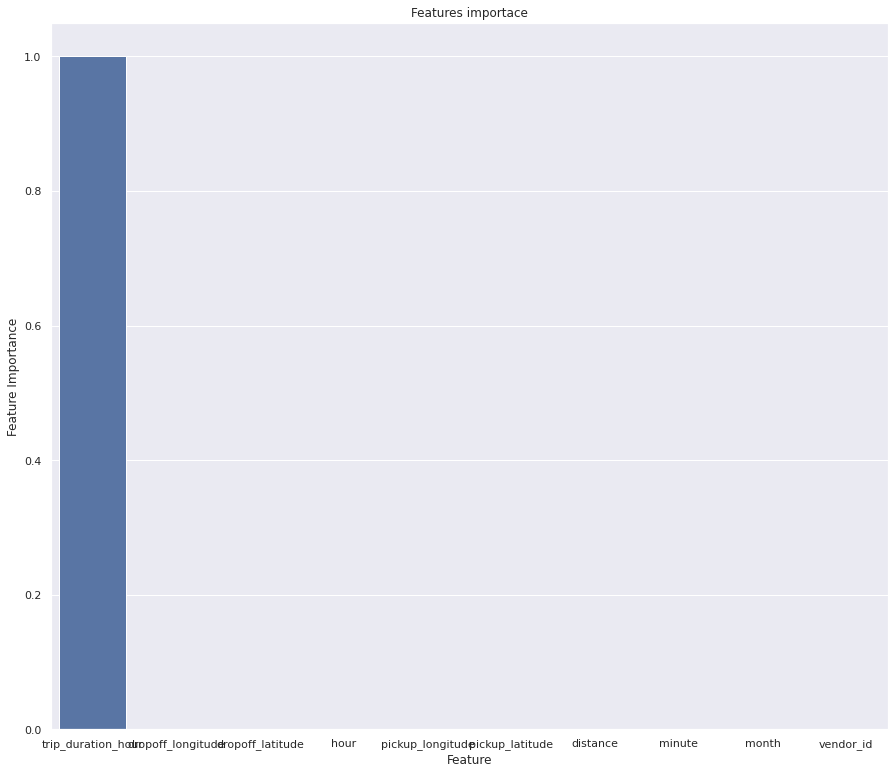

In [ ]:
plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))  

### Regularization

Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting.

### Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
lasso_regressor.score(X_train, y_train)

0.9999999959284138

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  0.9999999957540314


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

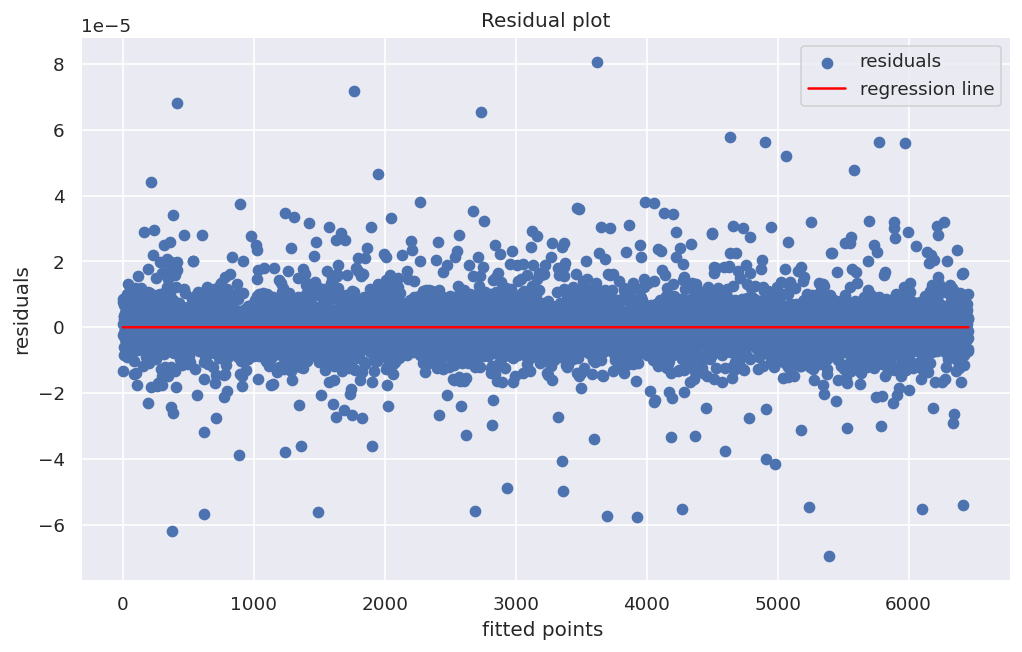

In [ ]:
#Heteroskedasticity
residuals=y_pred_lasso-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

MSE : 0.0 RMSE : 0.0
R2 : 0.9999999959284138 Adjusted R2 : 0.9999999959255742


(0.0, 0.0, 0.9999999959284138, 0.9999999959255742)

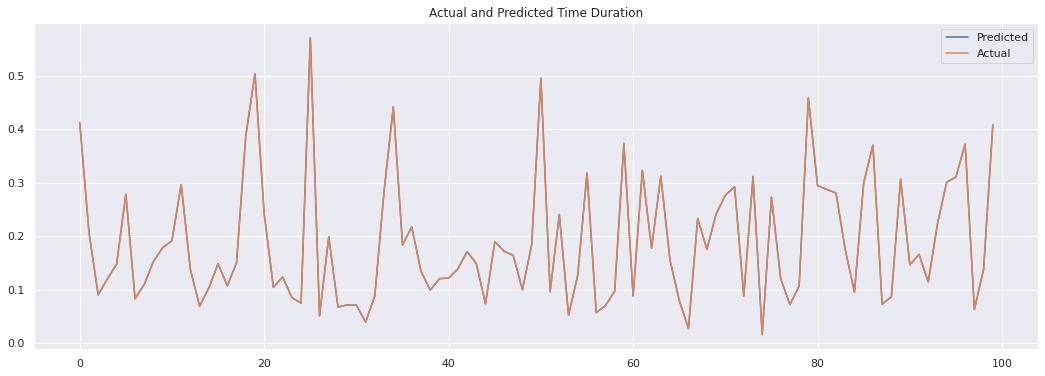

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lasso_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999999959260212 Adjusted R2 : 0.9999999959146325


(0.0, 0.0, 0.9999999959260212, 0.9999999959146325)

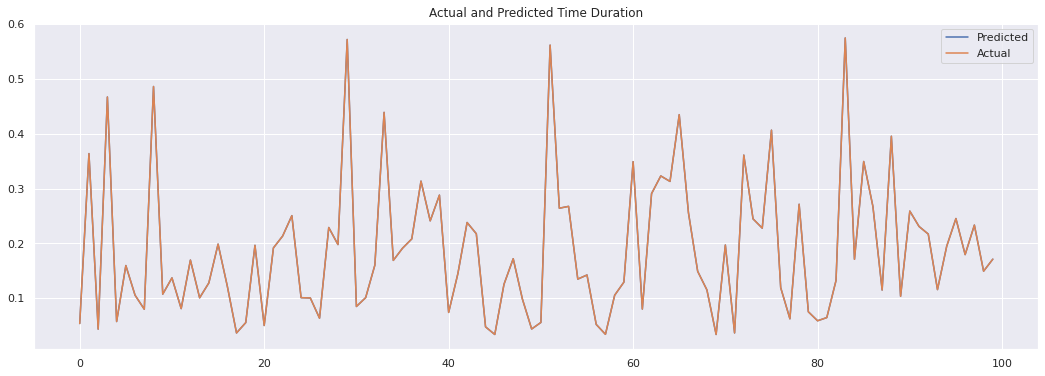

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_lasso)

### Ridge Regression

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
ridge_regressor.score(X_train, y_train)

1.0

In [ ]:

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  0.9999999957540314


In [ ]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

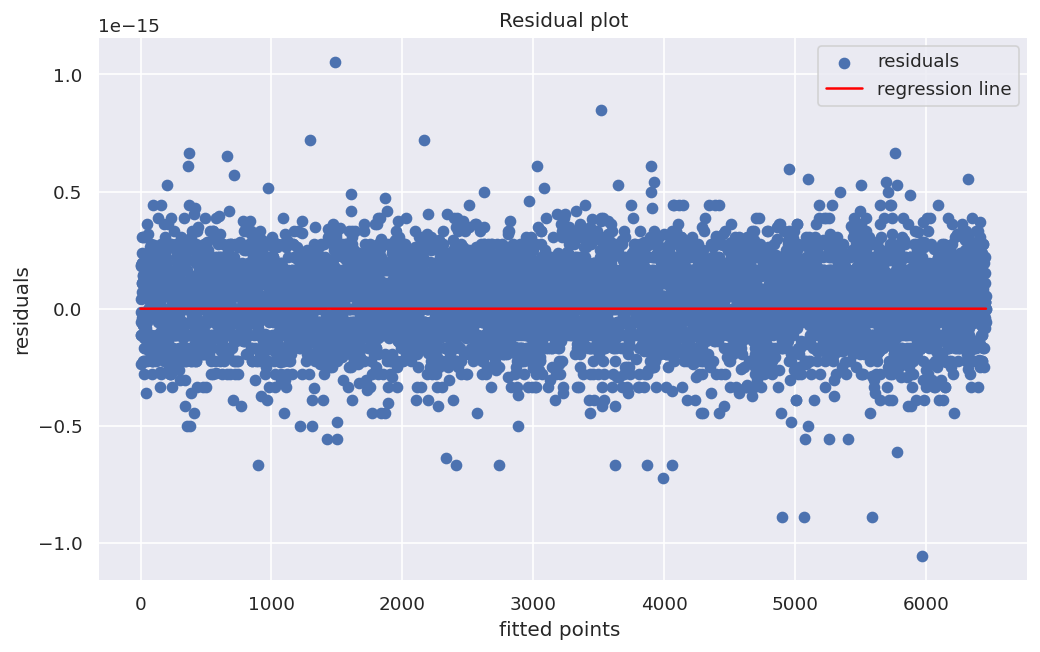

In [ ]:
#Heteroskedasticity
residuals=y_pred_ridge_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

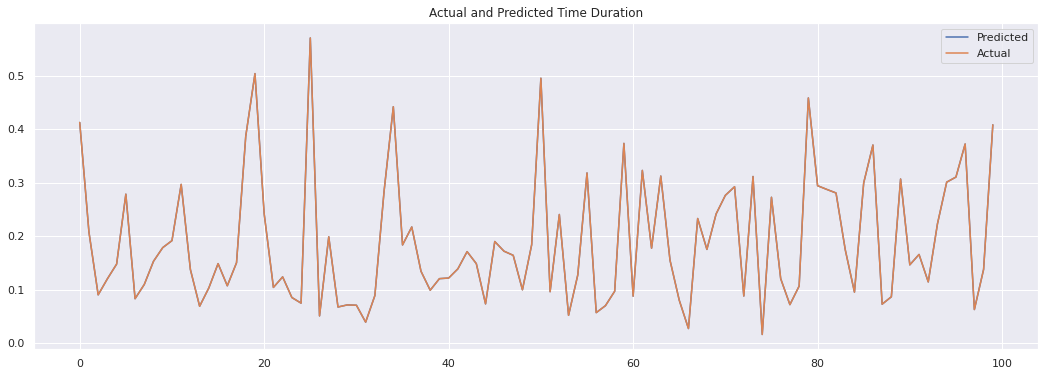

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_ridge_train)

MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

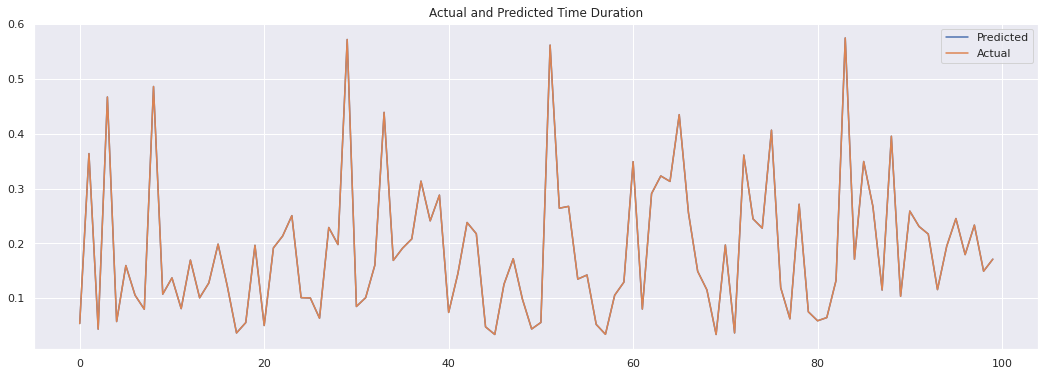

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_ridge_test)

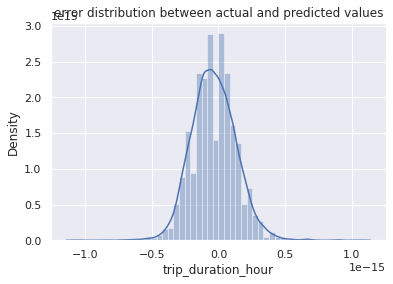

In [ ]:
sns.distplot(y_test - y_pred_ridge_test ).set_title("error distribution between actual and predicted values")
plt.show()

### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way

In [ ]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [ ]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[15:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   1.8s
[15:21:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   1.5s
[15:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   1.0s
[15:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   2.0s
[15:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
xgb_grid.best_score_

0.9999950846929089

In [ ]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [ ]:

xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999966816789805 Adjusted R2 : 0.9999966793646801


(0.0, 0.0, 0.9999966816789805, 0.9999966793646801)

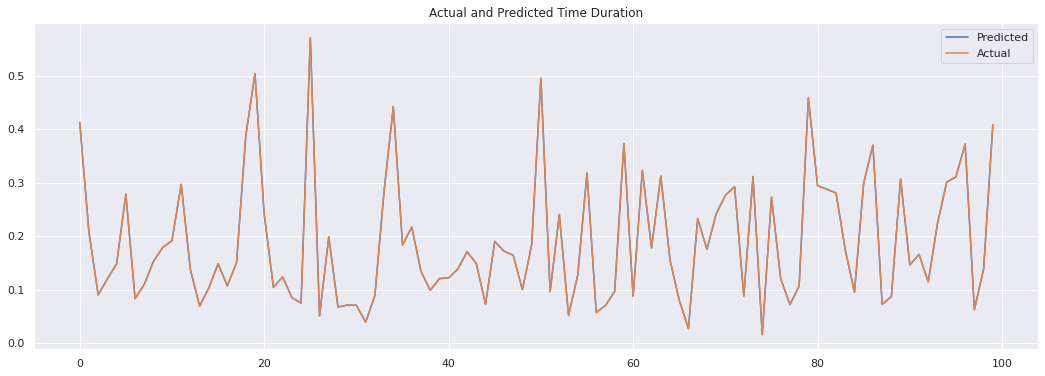

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_xgb_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999966490264154 Adjusted R2 : 0.9999966396588855


(0.0, 0.0, 0.9999966490264154, 0.9999966396588855)

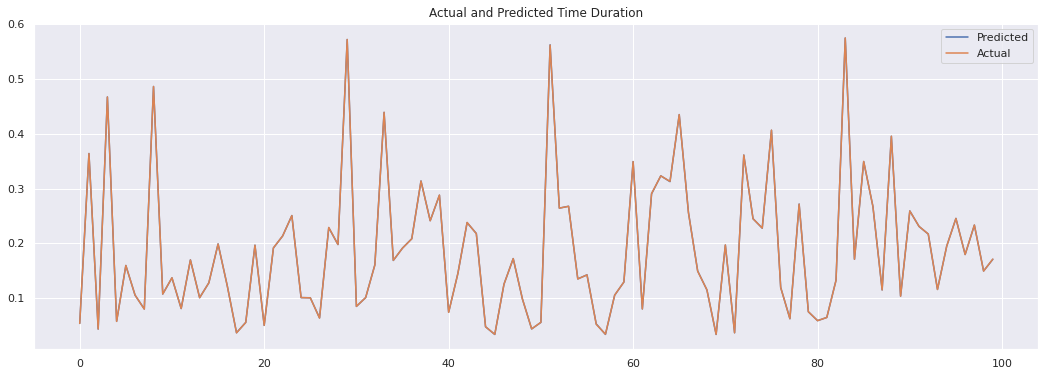

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_xgb_test)

In [ ]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Wednesday',
       'trip_duration_hour'],
      dtype='object')

In [ ]:
xgb_optimal_model.feature_importances_

array([0.0000000e+00, 0.0000000e+00, 2.0753625e-06, 2.0881669e-06,
       0.0000000e+00, 2.3072278e-06, 3.2860426e-06, 0.0000000e+00,
       0.0000000e+00, 2.5448294e-06, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9998766e-01], dtype=float32)

In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
17    trip_duration_hour            0.999988
6               distance            0.000003
9                 minute            0.000003
5       dropoff_latitude            0.000002
3        pickup_latitude            0.000002
2       pickup_longitude            0.000002
4      dropoff_longitude            0.000000
7                  month            0.000000
8                   hour            0.000000
1        passenger_count            0.000000
10  store_and_fwd_flag_N            0.000000
11  store_and_fwd_flag_Y            0.000000
12            Day_Friday            0.000000
13            Day_Monday            0.000000
14          Day_Saturday            0.000000
15            Day_Sunday            0.000000
16         Day_Wednesday            0.000000
0              vendor_id            0.000000

<AxesSubplot:title={'center':'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

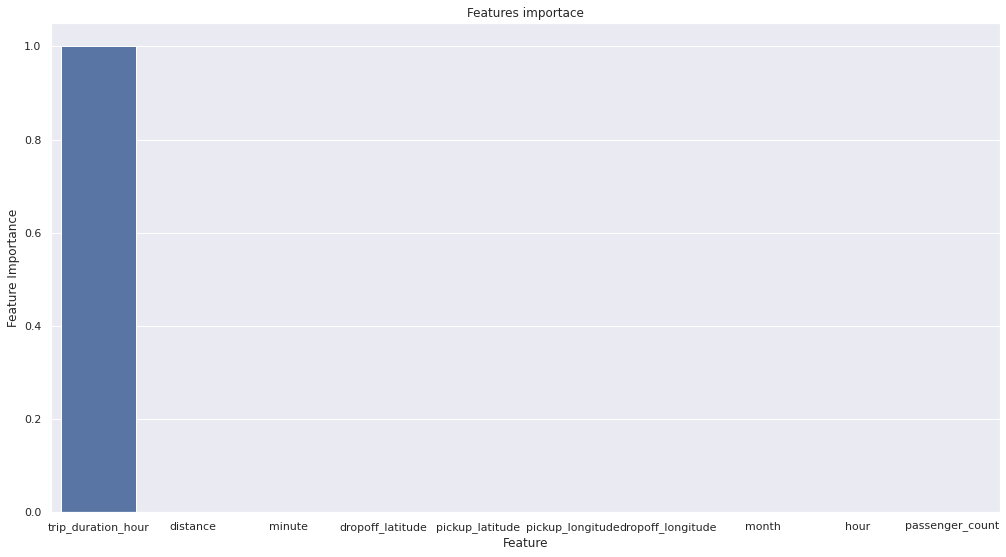

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

### GradientBoosting

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees

In [ ]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  11.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  10.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   7.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  11.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  13.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  12.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=   9.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=   9.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  10.5s
[CV] END max_depth=5,

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=2)

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
y_preds_gb = gb_optimal_model.predict(X_test)
y_pred_gb_train=gb_optimal_model.predict(X_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999995890280865 Adjusted R2 : 0.9999995887414619


(0.0, 0.0, 0.9999995890280865, 0.9999995887414619)

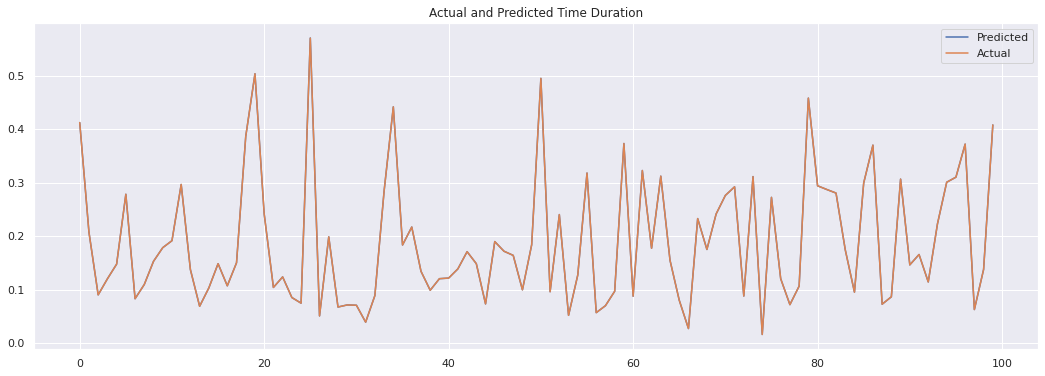

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_gb_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999992953690354 Adjusted R2 : 0.9999992933992641


(0.0, 0.0, 0.9999992953690354, 0.9999992933992641)

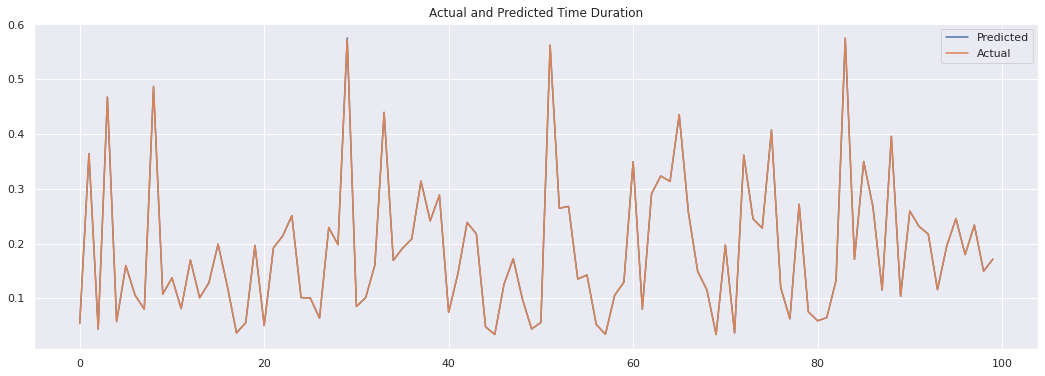

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_gb)

In [ ]:
xgb_optimal_model.feature_importances_

array([0.0000000e+00, 0.0000000e+00, 2.0753625e-06, 2.0881669e-06,
       0.0000000e+00, 2.3072278e-06, 3.2860426e-06, 0.0000000e+00,
       0.0000000e+00, 2.5448294e-06, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9998766e-01], dtype=float32)

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
17    trip_duration_hour        9.999999e-01
6               distance        5.159874e-08
5       dropoff_latitude        1.746833e-08
2       pickup_longitude        1.746682e-08
7                  month        1.556652e-08
4      dropoff_longitude        1.161103e-08
9                 minute        1.048111e-08
8                   hour        5.540617e-09
12            Day_Friday        2.093775e-09
3        pickup_latitude        2.024626e-09
14          Day_Saturday        1.845875e-09
13            Day_Monday        6.264529e-10
0              vendor_id        1.484330e-10
1        passenger_count        1.020922e-10
15            Day_Sunday        1.118712e-13
10  store_and_fwd_flag_N        0.000000e+00
11  store_and_fwd_flag_Y        0.000000e+00
16         Day_Wednesday        0.000000e+00

<AxesSubplot:title={'center':'Top 5 Features'}, xlabel='Feature', ylabel='Feature Importance'>

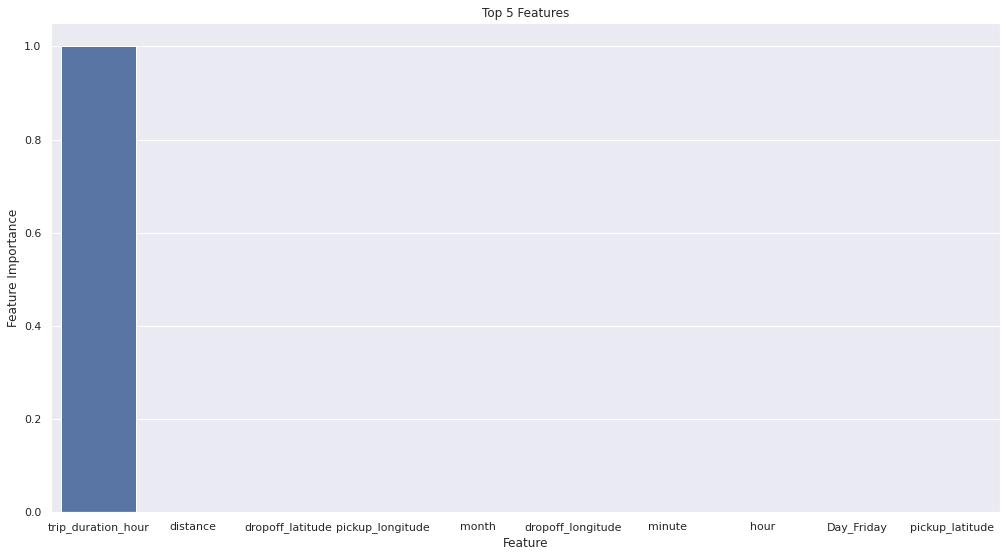

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

### Light GBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.

Lower memory usage.

Better accuracy.

Support of parallel, distributed, and GPU learning.

Capable of handling large-scale data.

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# Applying LightGBM
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]
params={"n_estimator":n_estimator,"max_depth":max_depth,"min_samples_split":min_samples_split}
lgb=LGBMRegressor()
gs_lgb=GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.6s
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.6s
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.5s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=20; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=20; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=20; total time=   0.4s
[CV] END ...max_depth=5, min_samples_split=50, n_estimator=5; total time=   0.4s
[CV] END ...max_depth=5, min_samples_split=50, n_estimator=5; total time=   0.4s
[CV] END ...max_depth=5, min_samples_split=50, n

In [ ]:
gs_lgb.best_estimator_

LGBMRegressor(max_depth=5, min_samples_split=40, n_estimator=5)

In [ ]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [ ]:
y_preds_lgb = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train=gs_lgb_opt_model.predict(X_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9999465262736019 Adjusted R2 : 0.9999463767896641


(0.0, 0.0, 0.9999465262736019, 0.9999463767896641)

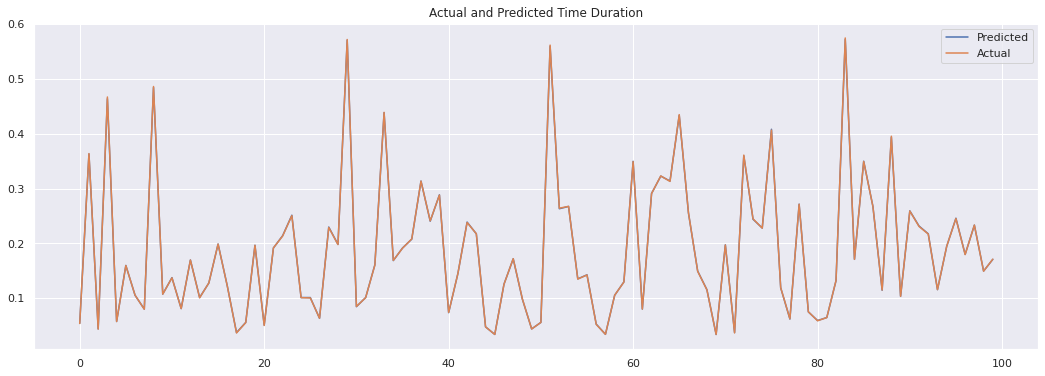

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_lgb)

In [ ]:
importances = gs_lgb_opt_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
17    trip_duration_hour                1932
6               distance                 158
4      dropoff_longitude                 122
5       dropoff_latitude                 119
3        pickup_latitude                 113
2       pickup_longitude                 107
9                 minute                  93
8                   hour                  62
7                  month                  28
1        passenger_count                  19
0              vendor_id                  13
12            Day_Friday                   9
16         Day_Wednesday                   9
13            Day_Monday                   8
15            Day_Sunday                   8
14          Day_Saturday                   2
10  store_and_fwd_flag_N                   0
11  store_and_fwd_flag_Y                   0

<AxesSubplot:title={'center':'Top 5 Features'}, xlabel='Feature', ylabel='Feature Importance'>

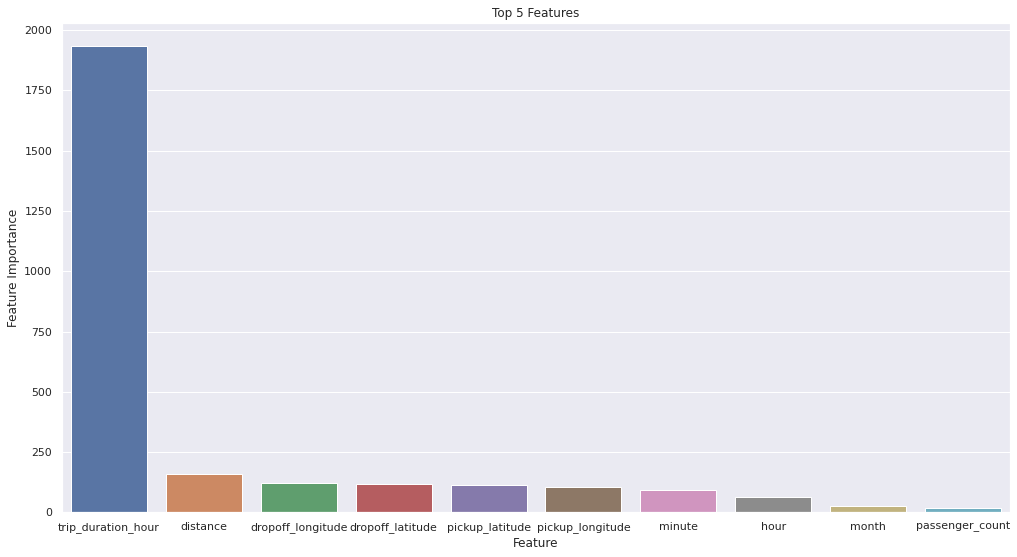

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

In [ ]:
#Train data

from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.0055473742826857575', '0.07448069738318619', '0.4975386610902135','0.49741929668112017'])
train.add_row(['2','Lasso Regression','0.005544777800761673','0.07446326477372364','0.4977738411443343','0.4976545326044711'])
train.add_row(['3','Ridge Regression ','0.0055447795071197434','0.07446327623144004','0.49777368658851806','0.4976543780119387'])
train.add_row(['4','DecisionTree Regressor','0.003933693284929908','0.0627191620234989','0.6437001193563989','0.6436154769741506'])
train.add_row(['5','XGBRegressor','0.001963513255289278','0.044311547651704496','0.8221519859766687','0.8221097365109717'])
train.add_row(['6','GradientBoosting','0.0022675373651197994','0.04761866614175369','0.7946145685424261','0.7945657773046455'])
train.add_row(['7','LightGBM','0.0032980298940813377','0.057428476334318135','0.7012762377478683','0.7012052731131748'])
print(train)

+-------+------------------------+-----------------------+----------------------+---------------------+---------------------+
| SL NO |       MODEL_NAME       |       Train MSE       |      Train RMSE      |      Train R^2      |  Train Adjusted R^2 |
+-------+------------------------+-----------------------+----------------------+---------------------+---------------------+
|   1   |   Linear Regression    | 0.0055473742826857575 | 0.07448069738318619  |  0.4975386610902135 | 0.49741929668112017 |
|   2   |    Lasso Regression    |  0.005544777800761673 | 0.07446326477372364  |  0.4977738411443343 |  0.4976545326044711 |
|   3   |   Ridge Regression     | 0.0055447795071197434 | 0.07446327623144004  | 0.49777368658851806 |  0.4976543780119387 |
|   4   | DecisionTree Regressor |  0.003933693284929908 |  0.0627191620234989  |  0.6437001193563989 |  0.6436154769741506 |
|   5   |      XGBRegressor      |  0.001963513255289278 | 0.044311547651704496 |  0.8221519859766687 |  0.82210973651

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.005472765706091576','0.07397814343501448','0.4957919161505717','0.495312438993758'])
test.add_row(['2','Lasso Regression','0.0054708980396948005','0.07396551926198315','0.49596398499944283','0.49548467147166453'])
test.add_row(['3','Ridge Regression ','0.005470874962507452','0.07396536326218815','0.49596611110990296','0.4954867996039515'])
test.add_row(['4','DecisionTree Regressor','0.004235598377226902','0.0650814749158845','0.609772634819681','0.6094015477356758'])
test.add_row(['5','XGBRegressor','0.0031445622329224813','0.056076396397436966','0.7102902292633624','0.7100147294813806'])
test.add_row(['6','GradientBoosting','0.003121489155427573','0.05587028866425851','0.7124159610810551',' 0.7121424827657667'])
test.add_row(['7','LightGBM','0.003418832582409957',' 0.058470784007142895','0.6850215927460219','0.6847220637301148'])
print(test)

+-------+------------------------+-----------------------+-----------------------+---------------------+---------------------+
| SL NO |       MODEL_NAME       |        Test MSE       |       Test RMSE       |       Test R^2      |  Test Adjusted R^2  |
+-------+------------------------+-----------------------+-----------------------+---------------------+---------------------+
|   1   |   Linear Regression    |  0.005472765706091576 |  0.07397814343501448  |  0.4957919161505717 |  0.495312438993758  |
|   2   |    Lasso Regression    | 0.0054708980396948005 |  0.07396551926198315  | 0.49596398499944283 | 0.49548467147166453 |
|   3   |   Ridge Regression     |  0.005470874962507452 |  0.07396536326218815  | 0.49596611110990296 |  0.4954867996039515 |
|   4   | DecisionTree Regressor |  0.004235598377226902 |   0.0650814749158845  |  0.609772634819681  |  0.6094015477356758 |
|   5   |      XGBRegressor      | 0.0031445622329224813 |  0.056076396397436966 |  0.7102902292633624 |  0.710

Hence we can conclude that Gradient boosting perform well.

## Observations:
We can observe that both the models shows somewhat similar learning rate but with visible differences in error rates.

Gradient boosting performed very well out pof all the models

XGBoost training curve on the other hand starts quite low and further improves with the increase in the training size and it too plateau towards the end.

Validation curve seems to show similar trend in both the models i.e. starts very high but improves with the training size with some differences in error rate i.e. XGBoost curve learning is quite fast and more accurate as compared to the RF one.

Both the models seems to suffer from high variance since the training curve error is very less in both the models.

The large gap at the end also indicates that the model suffers from quite a low bias i.e. overfitting the training data.

Also, both the model's still has potential to decrease and converge towards the training curve by the end.


**At this point, here are a few things we could do to improve our model:**

Add more training instances to improve validation curve in the XGBoost model.
Increase the regularization for the learning algorithm. This should decrease the variance and increase the bias towards the validation curve.
Reduce the numbers of features in the training data that we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance.

## End Notes


---


In this project we covered various aspects of the Machine learning development cycle. We observed that the data exploration and variable analysis is a very important aspect of the whole cycle and should be done for thorough understanding of the data. We also cleaned the data while exploring as there were some outliers which should be treated before feature engineering. Further we did feature engineering to filter and gather only the optimal features which are more significant and covered most of the variance in the dataset. Then finally we trained the models on the optimum featureset to get the results.

## Further Scope..


---



There's always a room for the improvement and a lot more to explore, and if this helped you in any way, I'd like to see One Upvote!. Also, please leave comments about any further improvements to this notebook!! Your feedback or any constructive criticism is highly appreciated.